[1, 2, 1, 3, 1, 0, 2, 1, 1, 1, 1, 0, 2, 3, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 1, 1, 3, 0, 2, 0, 1, 3, 1, 0, 1, 3, 3, 1, 0, 1, 3, 3, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 0, 1, 2, 5, 2, 0, 0, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 3, 0, 0, 3, 1, 3, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 3, 0, 1, 0, 0, 1, 1, 1, 2, 3, 0, 2, 1, 1, 0, 0, 3, 1, 0, 2, 3, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 3, 0, 2, 0, 0, 3, 1, 1, 2, 3, 4, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 3, 1, 1, 0, 1, 2, 1, 0, 3, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 3, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 3, 2, 2, 0, 0, 1, 1, 2, 1, 5, 1, 

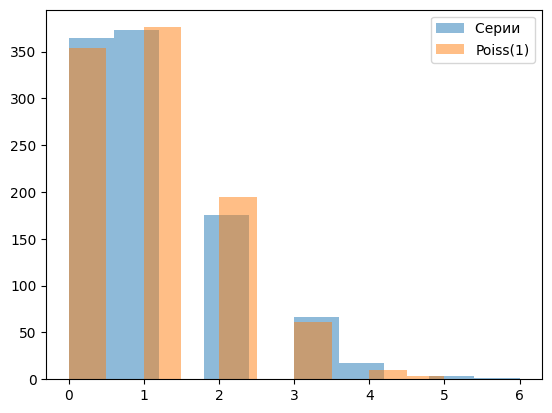

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

#1#
c = 2
n = 14
m = c*2**n
Serii = []
N = 1000

for j in range(N):
  X = np.random.binomial(1, 1/2, m)
  curr = 0
  serii=0
  DS = []
  for i in range(1,len(X)):
    if X[i-1] == X[i] and X[i-1] == 1:
      curr+=1
    elif X[i-1] != X[i]:
      if curr!=0:
        DS.append(curr+1)
      curr = 0
    if i == len(X) - 1:
      if curr!=0:
        DS.append(curr+1)

  for i in range(len(DS)):
    if DS[i] >= n:
      serii+=1
  Serii.append(serii)

print(Serii)
Y = np.random.poisson(1, N)
plt.hist(Y, alpha = 0.5)
plt.hist(Serii, alpha = 0.5)
plt.legend(('Серии ','Poiss(1)'))

#ведет себя как Poiss(1) согласно теореме Севастьянова

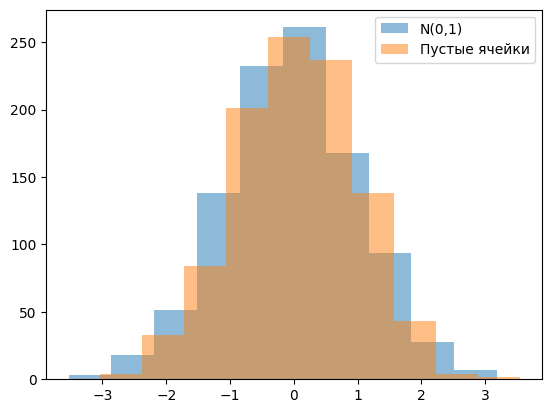

In [ ]:
#2#
#n частиц по n ячейкам равновероятно#
#знаем все факториальные моменты пустых ячеек E(mu_0(n,n)) = n*(1-1/n)^n, E(mu_0(n,n))^[2] = n(n-1)*(1-2/n)^n
m = 1000
n = 200
E = n*(1-1/n)**n
D = n*(n-1)*(1-2/n)**n + E - E**2
Empts = []
for j in range(m):
  N = [0]*n #ячейки
  empt = 0
  for i in range(n):
    curr = np.random.randint(n)
    N[curr]+=1
  for i in range(n):
    if(N[i]==0):
      empt+=1
  Empts.append((empt - E)/math.sqrt(D))
Y = np.random.normal(0, 1, m)
plt.hist(Y, alpha = 0.5)
plt.hist(Empts, alpha = 0.5)
plt.legend(('N(0,1)','Пустые ячейки'))

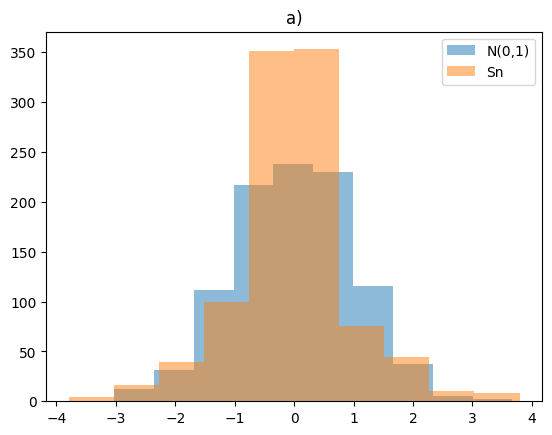

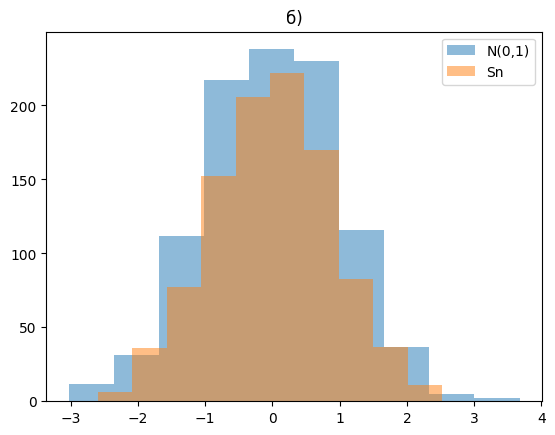

In [ ]:
#4#
#Лендеберг#

#a
#ES_n = 0
#DS_n = n
n = 10
Sum = 0
S = []
m = 1000
for j in range(m):
  Sum = 0
  for i in range(1, n):
    curr = np.random.choice([i, -i, 0], p = [1/(2*i**2), 1/(2*i**2), 1 - 1/(i**2)])
    Sum += curr
  S.append(Sum/math.sqrt(n))
plt.title(('a)'))
Y = np.random.normal(0, 1, m)
plt.hist(Y, alpha = 0.5)
plt.hist(S, alpha = 0.5)
plt.legend(('N(0,1)','Sn'))
plt.show()

#b
#ES_n = 0
#DS_n = n(n+1)(2n+1)/(6*2)
n = 10
Sum = 0
S_1 = []
m = 1000
for j in range(m):
  Sum = 0
  for i in range(1, n):
    curr = np.random.choice([i, -i, 0], p = [1/4, 1/4, 1/2])
    Sum += curr
  S_1.append(Sum/math.sqrt(n*(n+1)*(2*n+1)/(6*2)))
plt.title(('б)'))
plt.hist(Y, alpha = 0.5)
plt.hist(S_1, alpha = 0.5)
plt.legend(('N(0,1)','Sn'))


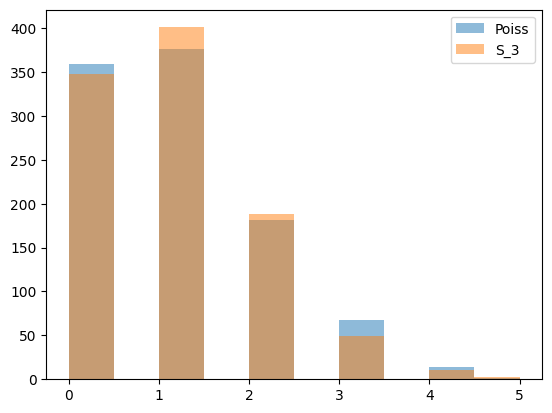

<Axes: ylabel='Density'>

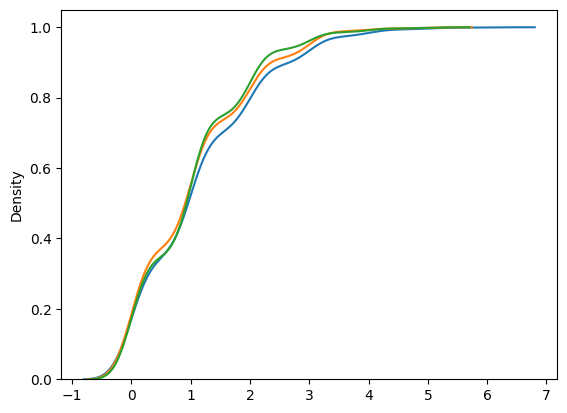

In [ ]:
#5#
import seaborn as sns
n = 10
m = 1000
S_1 = []
for j in range(m):
  S_1.append(sum(np.random.geometric(1 - 1/n, size = n) - 1))
#plt.hist(S)

n = 100
S_2 = []
for j in range(m):
  S_2.append(sum(np.random.geometric(1 - 1/n, size = n) - 1))

n = 1000
S_3 = []
for j in range(m):
  S_3.append(sum(np.random.geometric(1 - 1/n, size = n) - 1))

#plt.hist(S_1, alpha = 0.5)
#plt.hist(S_2, alpha = 0.5)
Y = np.random.poisson(1, n)
plt.hist(Y, alpha = 0.5)
plt.hist(S_3, alpha = 0.5)
plt.legend(('Poiss','S_3'))
plt.show()

sns.kdeplot(S_1, cumulative=True)
sns.kdeplot(S_2, cumulative=True)
sns.kdeplot(S_3, cumulative=True)